**Tutorial 7 - Monte Carlo Calculation $\pi$**

Here we will do a little warm up exercise in Monte Carlo calculations.


1) Imagine a circle circumscribed by a square.  The probability of a random point within the square being inside the circle is equal to the ratio of the area of the circle to the area of the square.  Use a uniform random number generator to calculate the value of $\pi$.  Use 1,000 and 10,000 points.

In [54]:
import numpy as np
import math
import matplotlib.pylab as plt
from matplotlib.colors import LogNorm

n_points = 1000, 10000
points_x, points_y = {}, {}
point_dist = {}; pi_derived = {}
for i in range(2):
    points_x[i] = np.random.uniform(0.0, 1.0, n_points[i])
    points_y[i] = np.random.uniform(0.0, 1.0, n_points[i])

    point_dist[i] = np.sqrt(points_x[i]**2 + points_y[i]**2)
    j = 0
    for d in point_dist[i]:
        if d < 1.0:
            j += 1
        else:
            None
    pi_derived[i] = 4. * (float(j)/float(n_points[i]))

print 'Estimated value of Pi: %s' %pi_derived

Estimated value of Pi: {0: 3.176, 1: 3.1352}


2) Repeat the calculations above in a loop and record the values of $\pi$.  Make a histogram of your calculated $\pi$ values.  What is the variance of your estimate of $\pi$ using 1,000 and 10,000?  How does it scale with the number of points?

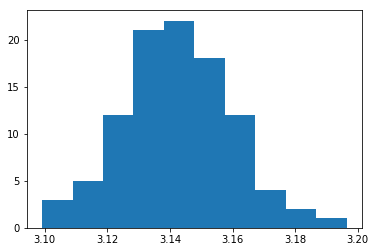

The variance of the estimated value of Pi is 0.000283737136


In [48]:
def mc_pi(nd, n_points):
    points = np.random.uniform(0.0, 1.0, (nd, n_points))
    point_dist = np.sqrt([np.sum(x) for x in zip(*points**2)])
    j = 0
    for d in point_dist:
        if d < 1.0:
            j += 1
        else:
            None
    return 4. * (math.gamma(nd/2. + 1.) * (float(j)/float(n_points)))**(2./nd)

Pi_array = np.array([mc_pi(2, 10000) for i in range(100)])

#print Pi_array
plt.figure()
plt.hist(Pi_array, bins=10)
plt.show()

Pi_var = np.var(Pi_array)
print 'The variance of the estimated value of Pi is %s' %Pi_var

3) What was done above in two dimensions can be done in more dimensions.  Calculate the volume of a 5 dimensional ball of unit radius in the same way.  Calculate its variance of your estimate in the same way.  Use enough points to get three significant figures.

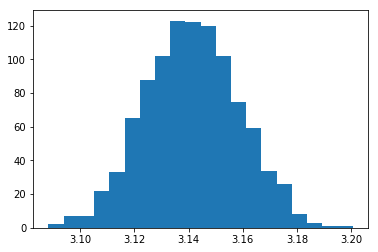

The variance of the estimated value of Pi is 0.000299352085022


In [53]:
Pi_array = np.array([mc_pi(5, 30000) for i in range(1000)])
#print Pi_array
plt.figure()
plt.hist(Pi_array, bins=20)
plt.show()

Pi_var = np.var(Pi_array)
print 'The variance of the estimated value of Pi is %s' %Pi_var